In [1]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score
from sklearn import metrics


In [2]:
train=pd.read_csv("train_A.csv")
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [3]:
test=pd.read_csv("test_A.csv")
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


<AxesSubplot:>

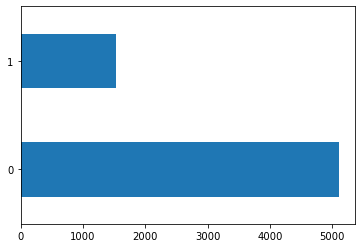

In [4]:
(train['Is_Churn'].value_counts()).plot(kind='barh')

In [5]:
train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [6]:
ID=test.ID

In [7]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [8]:
train

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,3444,36,0,1,563266.44,4,0,0,0,0,1
1,2246,53,0,2,875572.11,2,1,0,1,2,0
2,3691,35,0,3,701607.06,2,1,1,0,2,0
3,5094,43,0,3,1393922.16,0,1,1,1,2,1
4,3884,39,0,3,893146.23,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,4373,61,1,1,1354526.19,4,1,1,1,2,1
6646,543,42,0,1,596286.54,3,1,1,1,0,0
6647,5481,29,1,2,979298.19,2,0,1,0,2,0
6648,2255,66,0,0,395233.65,3,0,1,1,2,1


In [9]:
train.corr()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
ID,1.000000,-0.012018,-0.018171,-0.004129,-0.018269,-0.002460,0.008559,0.001269,-0.005606,-0.009383,0.018977
Age,-0.012018,1.000000,0.004851,-0.005011,0.002154,0.017353,0.032166,-0.027261,0.012089,0.003515,0.204301
Gender,-0.018171,0.004851,1.000000,-0.007610,0.017546,-0.001824,0.010854,-0.025051,-0.007461,0.002768,-0.053589
Income,-0.004129,-0.005011,-0.007610,1.000000,0.001582,-0.029539,-0.004818,0.008748,0.006145,-0.004035,0.004680
Balance,-0.018269,0.002154,0.017546,0.001582,1.000000,-0.019385,-0.005088,-0.254708,-0.025259,-0.009004,0.056380
Vintage,-0.002460,0.017353,-0.001824,-0.029539,-0.019385,1.000000,-0.027286,0.017063,0.001856,-0.000655,0.020152
Transaction_Status,0.008559,0.032166,0.010854,-0.004818,-0.005088,-0.027286,1.000000,0.004890,0.006526,-0.008646,-0.086917
Product_Holdings,0.001269,-0.027261,-0.025051,0.008748,-0.254708,0.017063,0.004890,1.000000,0.015538,-0.006866,-0.030769
Credit_Card,-0.005606,0.012089,-0.007461,0.006145,-0.025259,0.001856,0.006526,0.015538,1.000000,-0.017069,-0.000848
Credit_Category,-0.009383,0.003515,0.002768,-0.004035,-0.009004,-0.000655,-0.008646,-0.006866,-0.017069,1.000000,0.018691


In [10]:
#pip install imblearn

In [11]:
#conda install -c glemaitre imbalanced-learn


In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smt=SMOTE()

In [14]:
X= train.drop( ['Is_Churn','Credit_Category','Credit_Card','Income','ID'], axis=1)
y= train['Is_Churn']

In [15]:
Xtest= test.drop(columns = ['Credit_Category','Credit_Card','Income','ID'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [17]:
x_train_res,y_train_res=smt.fit_sample(X_train,y_train)

In [18]:
# importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() 



In [19]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train_res,y_train_res)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
    
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.6548872180451127


In [20]:
f1_score(y_test, y_pred, average='macro')

0.5678060957556544

In [21]:
param_grid={'n_estimators':[100,200,300,400],
    'criterion':["gini", "entropy"],
   'max_depth':[1,2,3],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3],
    'max_leaf_nodes':[1,2,3],
    'max_samples':[1,2,3]}

In [22]:
grid=GridSearchCV(estimator=clf,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    verbose=2,)

In [23]:
grid.fit(x_train_res,y_train_res)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


C:\Users\abhijit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5400 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhijit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhijit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\abhijit\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\abhijit\anaconda3\lib\

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'max_samples': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [24]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'max_samples': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [25]:
new_rf=RandomForestClassifier(criterion='gini',
 max_depth=1,
 max_leaf_nodes= 2,
 max_samples=3,
 min_samples_leaf= 1,
 min_samples_split= 2,
n_estimators=400, random_state=0)

In [26]:
new_rf.fit(x_train_res,y_train_res)


RandomForestClassifier(max_depth=1, max_leaf_nodes=2, max_samples=3,
                       n_estimators=400, random_state=0)

In [27]:
rf_pred=new_rf.predict(X_test)

In [28]:
f1_score(y_test, rf_pred, average='macro')

0.5799498746867169

In [29]:
rf_pred=new_rf.predict(Xtest)

In [30]:
df=pd.DataFrame({'Is_Churn':rf_pred},index=ID)
df

,Is_Churn
ID,
55480787,1
9aededf2,0
a5034a09,0
b3256702,0
dc28adb5,0
...,...
19e40adf,1
52d5bc8d,1
f708121b,1


In [31]:
name="RandomForestClassifier3.csv"
df.to_csv(name)